In [10]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

nameList = []
priceList = []
yearList = []
attributeList = []
costList = []

i = 1
url = 'https://www.carsome.my/buy-car?keywords=myvi'+str(i)

while i <= 50:

    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')

    car_names = soup.find_all('div', class_ = 'mod-card__title__variant-engine')
    car_prices = soup.find_all('div', class_ = 'mod-card__price__total')
    car_year = soup.find_all('div', class_ = 'mod-card__title__year-brand-model')
    car_attribute = soup.find_all('div', class_ = 'mod-card__car-other')
    car_cost = soup.find_all('div', class_ = 'mod-tooltipMonthPay')

    car_names = [j.text for j in car_names]
    car_prices = [j.text for j in car_prices]
    car_year = [j.text for j in car_year]
    car_cost = [j.text for j in car_cost]
    
    nameList += car_names
    priceList += car_prices
    yearList += car_year
    costList += car_cost
    
    print("number of pages that been scraped : ", i)
    i = i+1

number of pages that been scraped :  1
number of pages that been scraped :  2
number of pages that been scraped :  3
number of pages that been scraped :  4
number of pages that been scraped :  5
number of pages that been scraped :  6
number of pages that been scraped :  7
number of pages that been scraped :  8
number of pages that been scraped :  9
number of pages that been scraped :  10
number of pages that been scraped :  11
number of pages that been scraped :  12
number of pages that been scraped :  13
number of pages that been scraped :  14
number of pages that been scraped :  15
number of pages that been scraped :  16
number of pages that been scraped :  17
number of pages that been scraped :  18
number of pages that been scraped :  19
number of pages that been scraped :  20
number of pages that been scraped :  21
number of pages that been scraped :  22
number of pages that been scraped :  23
number of pages that been scraped :  24
number of pages that been scraped :  25
number of

In [16]:
df_name = pd.DataFrame()
df_price = pd.DataFrame()
df_year = pd.DataFrame()
df_cost = pd.DataFrame()

df_name['Car_Name'] = nameList
df_name = df_name.replace(r'\r+|\n+|\t+','', regex=True)
df_price['Car_Price'] = priceList
df_price = df_price.replace(r'\r+|\n+|\t+','', regex=True)
df_year['Car_Year'] = yearList
df_year = df_year.replace(r'\r+|\n+|\t+','', regex=True)
df_cost['Monthly_Payment'] = costList
df_cost = df_cost.replace(r'\r+|\n+|\t+','', regex=True)

df_myvi = pd.concat([df_name, df_price, df_year, df_cost], axis = 1)
df_myvi

,Car_Name,Car_Price,Car_Year,Monthly_Payment
0,MYVI SE 1.5,"RM 36,900",2015 Perodua,RM 404/mo
1,MYVI X 1.3,"RM 32,900",2015 Perodua,RM 361/mo
2,MYVI EZI 1.3,"RM 30,100",2013 Perodua,RM 330/mo
3,MYVI EZI 1.3,"RM 29,400",2013 Perodua,RM 322/mo
4,MYVI EZI 1.3,"RM 28,400",2013 Perodua,RM 311/mo
...,...,...,...,...
895,MYVI ADVANCED 1.5 ...,"RM 39,900",2016 Perodua,RM 437/mo
896,MYVI AV 1.5,"RM 49,900",2018 Perodua,RM 547/mo
897,MYVI G 1.3,"RM 29,300",2015 Perodua,RM 321/mo
898,MYVI SE 1.5,"RM 30,900",2013 Perodua,RM 339/mo


In [13]:
df_myvi.isnull().sum()

Car_Name           0
Car_Price          0
Car_Year           0
Monthly_Payment    0
dtype: int64

In [91]:
df_harga = df_myvi["Car_Price"].str.replace(',', '')
df_harga
df_myvi = pd.concat([df_name, df_harga, df_year, df_cost], axis = 1)
df_myvi

,Car_Name,Car_Price,Car_Year,Monthly_Payment
0,MYVI SE 1.5,36900,2015 Perodua,RM 404/mo
1,MYVI X 1.3,32900,2015 Perodua,RM 361/mo
2,MYVI EZI 1.3,30100,2013 Perodua,RM 330/mo
3,MYVI EZI 1.3,29400,2013 Perodua,RM 322/mo
4,MYVI EZI 1.3,28400,2013 Perodua,RM 311/mo
...,...,...,...,...
895,MYVI ADVANCED 1.5 ...,39900,2016 Perodua,RM 437/mo
896,MYVI AV 1.5,49900,2018 Perodua,RM 547/mo
897,MYVI G 1.3,29300,2015 Perodua,RM 321/mo
898,MYVI SE 1.5,30900,2013 Perodua,RM 339/mo


In [95]:
df_tahun = df_myvi["Car_Year"].replace('Perodua', ' ',regex=True)
df_myvi = pd.concat([df_name, df_harga, df_tahun, df_cost], axis = 1)
df_myvi

,Car_Name,Car_Price,Car_Year,Monthly_Payment
0,MYVI SE 1.5,36900,2015,RM 404/mo
1,MYVI X 1.3,32900,2015,RM 361/mo
2,MYVI EZI 1.3,30100,2013,RM 330/mo
3,MYVI EZI 1.3,29400,2013,RM 322/mo
4,MYVI EZI 1.3,28400,2013,RM 311/mo
...,...,...,...,...
895,MYVI ADVANCED 1.5 ...,39900,2016,RM 437/mo
896,MYVI AV 1.5,49900,2018,RM 547/mo
897,MYVI G 1.3,29300,2015,RM 321/mo
898,MYVI SE 1.5,30900,2013,RM 339/mo


In [97]:
df_myvi["Car_Price"] = pd.to_numeric(df_myvi["Car_Price"])
df_myvi

,Car_Name,Car_Price,Car_Year,Monthly_Payment
0,MYVI SE 1.5,36900,2015,RM 404/mo
1,MYVI X 1.3,32900,2015,RM 361/mo
2,MYVI EZI 1.3,30100,2013,RM 330/mo
3,MYVI EZI 1.3,29400,2013,RM 322/mo
4,MYVI EZI 1.3,28400,2013,RM 311/mo
...,...,...,...,...
895,MYVI ADVANCED 1.5 ...,39900,2016,RM 437/mo
896,MYVI AV 1.5,49900,2018,RM 547/mo
897,MYVI G 1.3,29300,2015,RM 321/mo
898,MYVI SE 1.5,30900,2013,RM 339/mo


In [103]:
df_myvi["Car_Year"].value_counts()

          2015                       297
          2013                       295
          2016                       149
          2018                       105
          2017                        50
          2019                         4
Name: Car_Year, dtype: int64

In [104]:
year_2013 = df_myvi[df_myvi["Car_Year"].str.contains('2013', case=False)]
year_2015 = df_myvi[df_myvi["Car_Year"].str.contains('2015', case=False)]
year_2016 = df_myvi[df_myvi["Car_Year"].str.contains('2016', case=False)]
year_2017 = df_myvi[df_myvi["Car_Year"].str.contains('2017', case=False)]
year_2018 = df_myvi[df_myvi["Car_Year"].str.contains('2018', case=False)]
year_2019 = df_myvi[df_myvi["Car_Year"].str.contains('2019', case=False)]

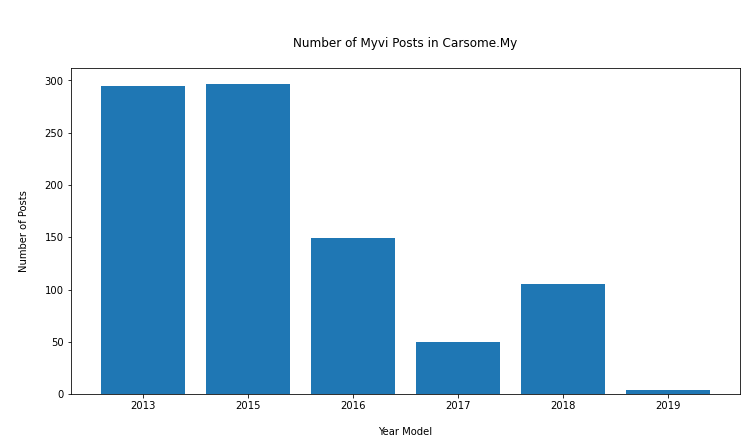

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline
x = ('2013','2015','2016','2017','2018','2019', )
x_axis = np.arange(len(x))
y_axis = [len(year_2013), len(year_2015), len(year_2016), len(year_2017), len(year_2018), len(year_2019)]
x_labels = [295, 297,149, 50, 105,4]

plt.figure(figsize = (12,6))
plt.bar(x_axis, y_axis)
plt.xticks(x_axis, x)
plt.ylabel("\nNumber of Posts\n")
plt.xlabel("\nYear Model")
plt.title('\n\nNumber of Myvi Posts in Carsome.My\n')
plt.show
plt.savefig('my_plot.png')

Average price for Myvi 2019 model: RM 46025.00
Average price for Myvi 2018 model: RM 49609.52
Average price for Myvi 2017 model: RM 40050.00
Average price for Myvi 2016 model: RM 38910.07
Average price for Myvi 2015 model: RM 34462.29
Average price for Myvi 2013 model: RM 29629.15


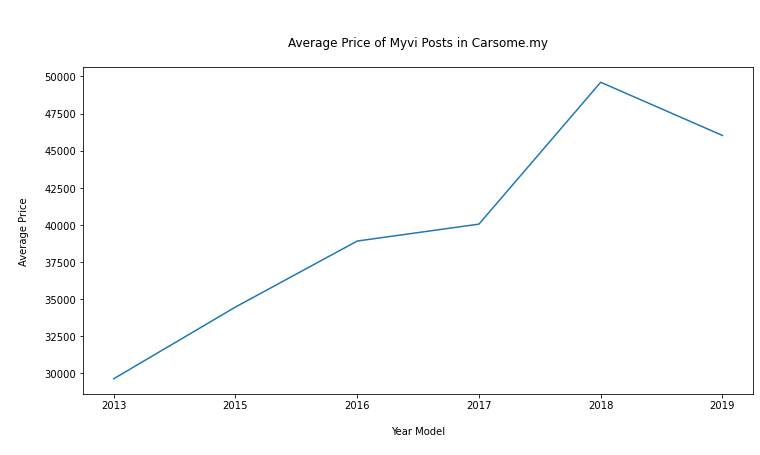

In [166]:
print("Average price for Myvi 2019 model: RM %.2f" % round(year_2019['Car_Price'].mean(),2))
print("Average price for Myvi 2018 model: RM %.2f" % round(year_2018['Car_Price'].mean(),2))
print("Average price for Myvi 2017 model: RM %.2f" % round(year_2017['Car_Price'].mean(),2))
print("Average price for Myvi 2016 model: RM %.2f" % round(year_2016['Car_Price'].mean(),2))
print("Average price for Myvi 2015 model: RM %.2f" % round(year_2015['Car_Price'].mean(),2))
print("Average price for Myvi 2013 model: RM %.2f" % round(year_2013['Car_Price'].mean(),2))

linechart = {'2013': [round(year_2013['Car_Price'].mean(),2)],
             '2015': [round(year_2015['Car_Price'].mean(),2)],
             '2016': [round(year_2016['Car_Price'].mean(),2)],
             '2017': [round(year_2017['Car_Price'].mean(),2)],
             '2018': [round(year_2018['Car_Price'].mean(),2)],
             '2019': [round(year_2019['Car_Price'].mean(),2)]}

names = list(linechart.keys())
values = list(linechart.values())

plt.figure(figsize = (12,6))
plt.plot(names,values)
plt.ylabel("\nAverage Price\n")
plt.xlabel("\nYear Model\n")
plt.title("\n\nAverage Price of Myvi Posts in Carsome.my\n")

plt.plot()
plt.savefig('my_plot.png')